<a href="https://colab.research.google.com/github/allanstar-byte/KNN-and-Bayessian/blob/main/K_nearest_neighbor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-nearest neighbor.**

## **Importing libraries**

In [15]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_('/content/train (5).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Data understanding**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

## **Data cleaning**

In [24]:
# removing unwanted columns
df1 = df.drop(columns={'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'}, axis='columns')
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [25]:
# label enchoding the sex column

# converting type of columns to 'category'
df1['Sex'] = df1['Sex'].astype('category')

# Assigning numerical values and storing in another column
df1['Sex'] = df1['Sex'].cat.codes
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [26]:
# checking for null values
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [27]:
#dropping the null values
df2 = df1.dropna()
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [28]:
# checking for data shape after cleaning
df2.shape

(714, 6)

## **Exploratory Data Analysis**

### **1. Univariate Analysis**

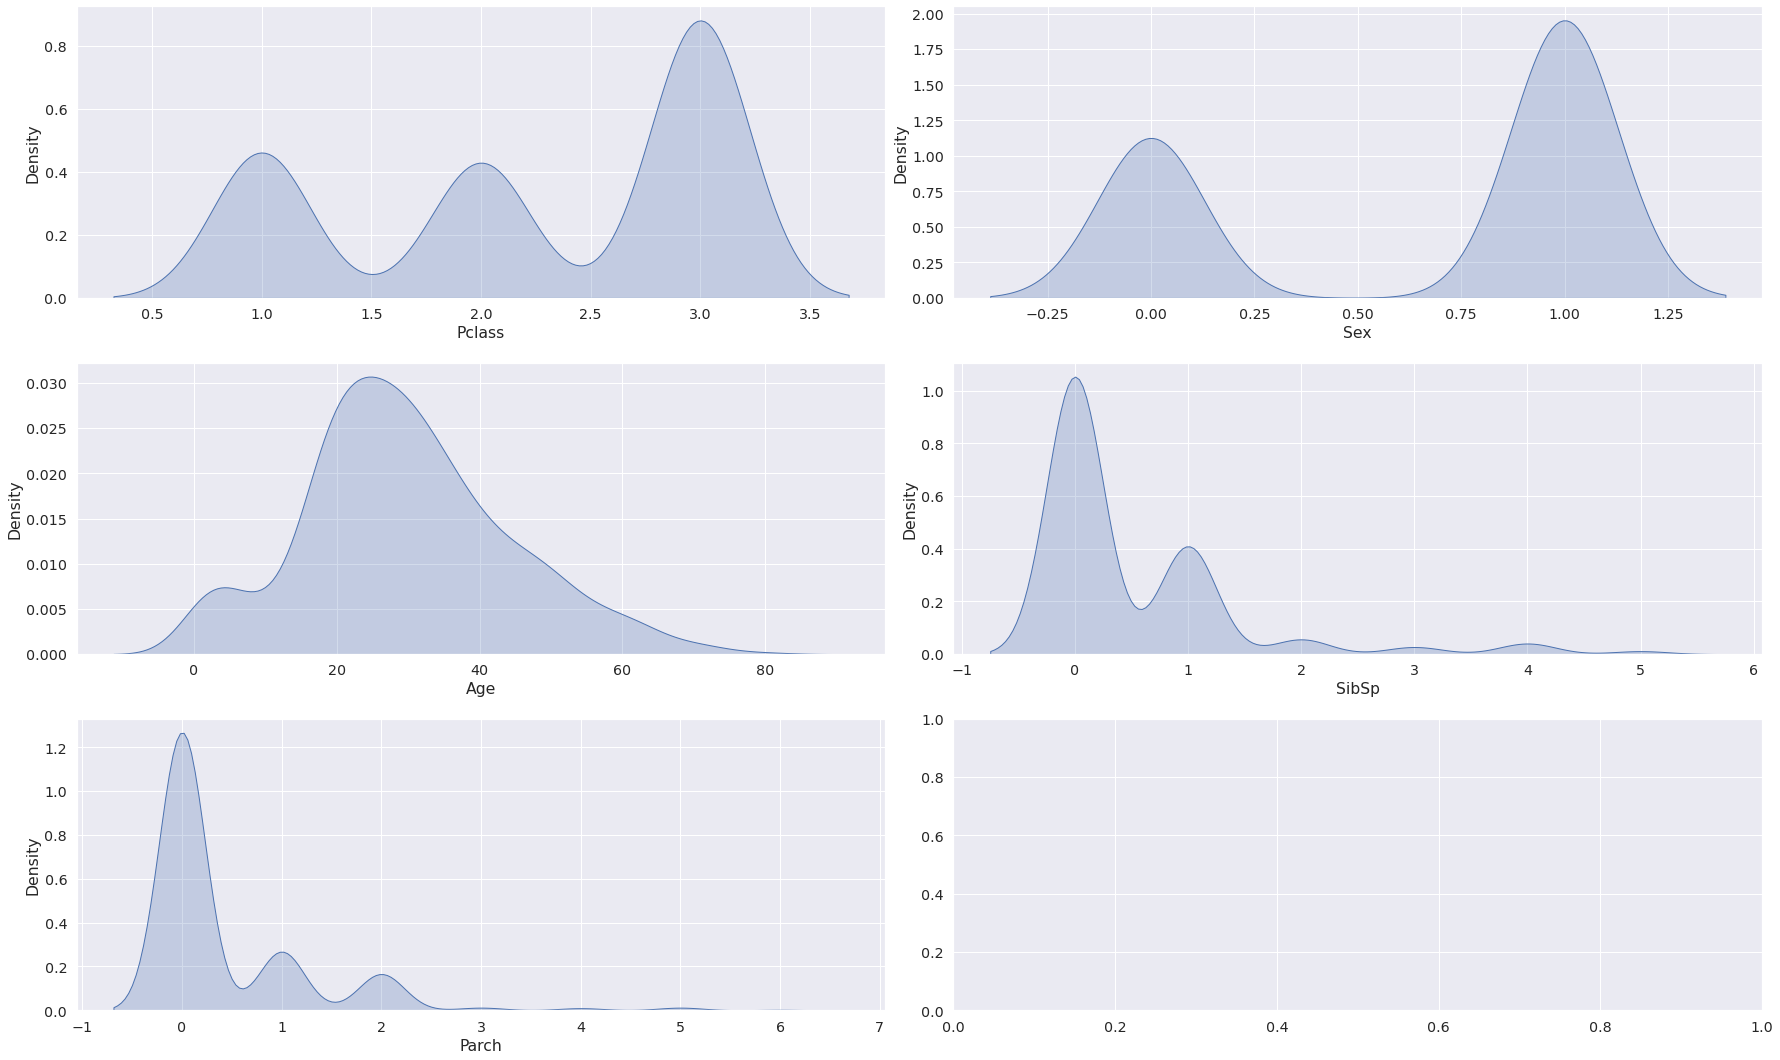

In [35]:
f = df2.drop(columns={'Survived'}, axis='columns')
f1 = f.describe()
f1

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(25, 15))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(f):
  plot = sns.kdeplot(data=f, x=c, ax=axes[i], fill=True)
plt.tight_layout()

From the graphs we can observe that the variables don't have a normal distribution.since for a normal distribution has a bell-sahaped figure around the mean.

### **2. Bivariate Analysis**

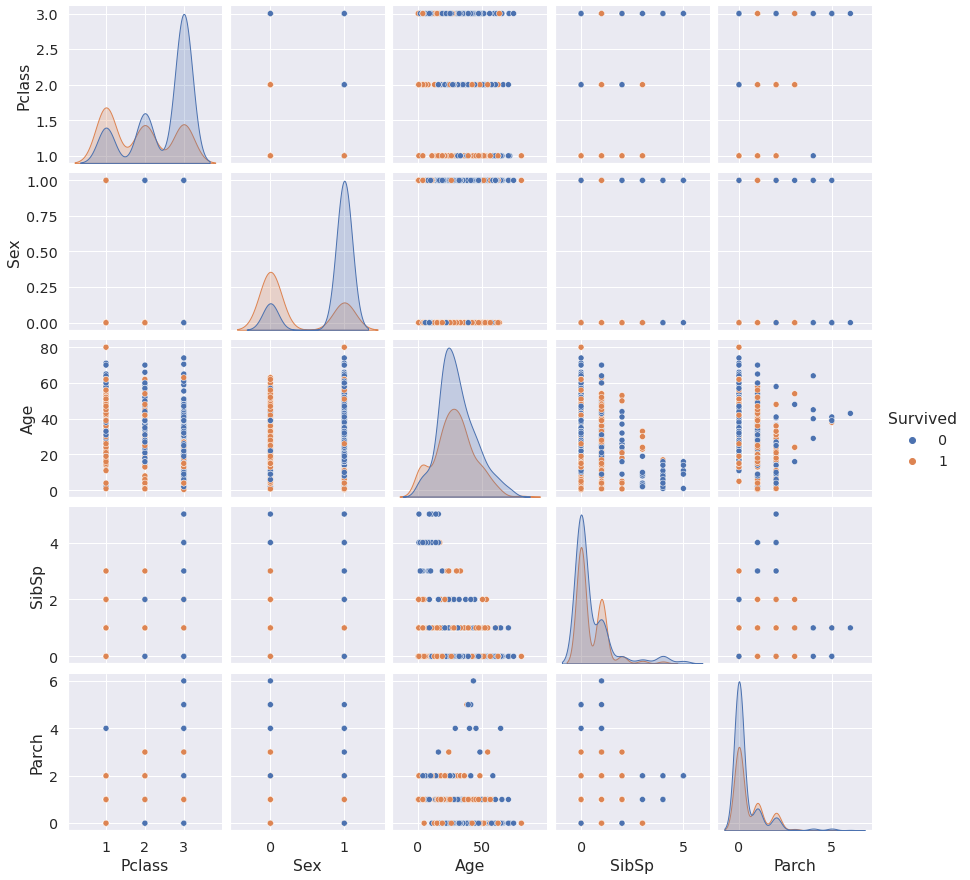

In [36]:
import warnings
warnings.simplefilter('ignore')
sns.pairplot(hue="Survived",
             data=df2)

This pair plot helps to see the relationship between variables

## **Modelling**

### **a) Classification**

In [39]:
# Splitting our dataset into its attributes and labels
# ---

X = df2.drop(columns={'Survived'}, axis='columns').values
y = df2['Sex'].values

In [40]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### **1. KNN without improveents**

In [41]:
# fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [43]:
# Evaluating the Algorithm
# ---

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36 13]
 [ 6 88]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.87      0.94      0.90        94

    accuracy                           0.87       143
   macro avg       0.86      0.84      0.85       143
weighted avg       0.87      0.87      0.86       143



According to the confusion matrics 36 and 88 are the correct predictions while 6 and 13 are the wrong predictions

In [44]:
# model score
classifier.score(X_test, y_test)

0.8671328671328671

The model without any improvements has a predictability power of 0.8671328671328671

#### **2. Dimension reduction - Linear Discriminant Analysis**

In [45]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [46]:
# Feature Scaling
# ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Fitting the model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [51]:
# Training and Predictions
# ---

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [53]:
# Evaluating the Algorithm
# ---
 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51  0]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        92

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



According to the confusion matrics 51 and 92 are the correct predictions while there are no wrong predictions

In [54]:
# model score
classifier.score(X_test, y_test)

1.0

### **b) Regression**

In [56]:
from sklearn.neighbors import KNeighborsRegressor

# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### **1. KNN without improvements**

In [57]:
# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [59]:
# Making our prediction
# ---
# 
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.14026469398370223


In [60]:
# model score
clf.score(X_test, y_test)

0.4182002581596903

#### **2. Dimension reduction - Linear Discriminant Analysis**

In [70]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [71]:
# Feature Scaling
# ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Fitting the model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [73]:
# Training and Predictions
# ---

clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [74]:
# The final step is to make predictions on our test data
# ---
y_pred = clf.predict(X_test)

In [75]:
# Evaluating the Algorithm
# ---
 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0]
 [ 0 97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        97

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [76]:
# model score
clf.score(X_test, y_test)

1.0

Using the classification KNN is way better compared to regressor without improvements. classification has a score of 81% while regression has 41%

## **70 - 30 Split**

Since classifier has the best score I will use it for adjustments 

In [77]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [78]:
# fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [80]:
# Evaluating the Algorithm
# ---

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 63  23]
 [  9 120]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        86
           1       0.84      0.93      0.88       129

    accuracy                           0.85       215
   macro avg       0.86      0.83      0.84       215
weighted avg       0.85      0.85      0.85       215



The incorrect predictions increases to 9 and 13

In [81]:
# model score
classifier.score(X_test, y_test)

0.8511627906976744

The model score reduces to 85%

## **60 - 40 Split**

In [82]:
# Train Test Split
# ---

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [83]:
# fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [85]:
# Evaluating the Algorithm
# ---

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 70  40]
 [  7 169]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       110
           1       0.81      0.96      0.88       176

    accuracy                           0.84       286
   macro avg       0.86      0.80      0.81       286
weighted avg       0.85      0.84      0.83       286



In [86]:
# model score
classifier.score(X_test, y_test)

0.8356643356643356

The model score decreases to 83%

## **Conclusion**

The more I increase the test set and reduce the training set the model accuracy reduces

## **Recommendation**

For the better performance of the model we need to use more data for the training set as observed.